In [35]:
import pandas as pd

# samuli's code from movies_data_wrangling.ipynb

df = pd.read_json('movie_data.json')

df = df.drop(labels=['Response', 'Website', 'Production', 'DVD', 'Poster', 'Type'], axis=1)

df = df.replace('N/A', None)

df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('uint16')

df['Metascore'] = pd.to_numeric(df['Metascore'], errors='coerce')

df['imdbRating'] = pd.to_numeric(df['imdbRating'], errors='coerce')

df = df.apply(lambda x: x.str.replace(',', '') if x.name in ('imdbVotes', 'BoxOffice') else x)
df['imdbVotes'] = pd.to_numeric(df['imdbVotes'], errors='coerce')

df = df.apply(lambda x: x.str.replace('$', '') if x.name == 'BoxOffice' else x)
df['BoxOffice'] = pd.to_numeric(df['BoxOffice'], errors='coerce')

df = df.apply(lambda x: x.str.replace(' min', '') if x.name == 'Runtime' else x)
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')

df = df.apply(lambda x: x.str.replace('Greek, Ancient', 'Ancient Greek') if x.name=='Language' else x)

df = df.apply(lambda x: x.str.split(', ') if x.name in (
    'Genre', 'Director', 'Writer', 'Actors', 'Language', 'Country'
) else x)

df['Released'] = pd.to_datetime(df['Released'])

df['RottenTomatoes'] = df['Ratings'].apply(lambda x: [i['Value'] for i in x if i['Source'] == 'Rotten Tomatoes'])
df['RottenTomatoes'] = df['RottenTomatoes'].apply(lambda x: x[0] if len(x) != 0 else None)
df = df.apply(lambda x: x.str.replace('%', '') if x.name == 'RottenTomatoes' else x)
df['RottenTomatoes'] = pd.to_numeric(df['RottenTomatoes'], errors='coerce')
df = df.drop(labels='Ratings', axis=1)

df.to_pickle("movie_data.pkl")

df

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Metascore,imdbRating,imdbVotes,imdbID,BoxOffice,RottenTomatoes
0,Star Wars: Episode VII - The Force Awakens,2015,PG-13,2015-12-18,138.0,"[Action, Adventure, Sci-Fi]",[J.J. Abrams],"[Lawrence Kasdan, J.J. Abrams, Michael Arndt]","[Daisy Ridley, John Boyega, Oscar Isaac]",30 years after the defeat of Darth Vader and t...,[English],"[United States, United Kingdom]",Nominated for 5 Oscars. 64 wins & 140 nominati...,80.0,7.8,983726.0,tt2488496,936662225.0,93.0
1,Avatar: The Way of Water,2022,PG-13,2022-12-16,192.0,"[Action, Adventure, Fantasy]",[James Cameron],"[James Cameron, Rick Jaffa, Amanda Silver]","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",Jake Sully lives with his newfound family form...,[English],[United States],Won 1 Oscar. 75 wins & 150 nominations total,67.0,7.5,509749.0,tt1630029,684075767.0,76.0
2,Indiana Jones and the Dial of Destiny,2023,PG-13,2023-06-30,154.0,"[Action, Adventure, Sci-Fi]",[James Mangold],"[Jez Butterworth, John-Henry Butterworth, Davi...","[Harrison Ford, Phoebe Waller-Bridge, Antonio ...",The plot is unknown at this time.,"[English, German, Ancient Greek (to 1453), Spa...",[United States],Nominated for 1 Oscar. 7 wins & 34 nominations...,58.0,6.5,207798.0,tt1462764,174480468.0,70.0
3,Avengers: Endgame,2019,PG-13,2019-04-26,181.0,"[Action, Adventure, Drama]","[Anthony Russo, Joe Russo]","[Christopher Markus, Stephen McFeely, Stan Lee]","[Robert Downey Jr., Chris Evans, Mark Ruffalo]",After the devastating events of Avengers: Infi...,"[English, Japanese, Xhosa, German]",[United States],Nominated for 1 Oscar. 70 wins & 133 nominatio...,78.0,8.4,1297673.0,tt4154796,858373000.0,94.0
4,Pirates of the Caribbean: On Stranger Tides,2011,PG-13,2011-05-20,136.0,"[Action, Adventure, Fantasy]",[Rob Marshall],"[Ted Elliott, Terry Rossio, Stuart Beattie]","[Johnny Depp, Penélope Cruz, Ian McShane]",Captain Jack Sparrow (Johnny Depp) crosses pat...,"[English, Spanish]","[United States, United Kingdom]",3 wins & 31 nominations,45.0,6.6,570796.0,tt1298650,241071802.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5854,Cavite,2005,Not Rated,2005-03-12,80.0,"[Crime, Drama, Thriller]","[Neill Dela Llana, Ian Gamazon]","[Neill Dela Llana, Ian Gamazon]","[Ian Gamazon, Edwin Lagda, Edgar Tancangco]","Adam, a security guard, travels from Californi...","[English, Filipino, Tagalog]","[Philippines, United States]",4 wins & 2 nominations,64.0,6.0,676.0,tt0428303,70071.0,73.0
5855,Following,1998,R,1999-11-05,69.0,"[Crime, Mystery, Thriller]",[Christopher Nolan],[Christopher Nolan],"[Jeremy Theobald, Alex Haw, Lucy Russell]",An older man listens to Bill's story about bei...,[English],"[United Kingdom, United States]",5 wins & 4 nominations,60.0,7.4,102938.0,tt0154506,48482.0,82.0
5856,Return to the Border,2005,PG,NaT,60.0,[Documentary],[Liang Zhao],None,None,"In the past half-century, millions of people a...","[English, Chinese]","[China, United States]",None,NaN,NaN,NaN,tt7667758,NaN,NaN
5857,My Date with Drew,2004,PG,2005-09-30,90.0,[Documentary],"[Jon Gunn, Brian Herzlinger, Brett Winn]",None,"[Brian Herzlinger, Drew Barrymore, John August]","""If you don't take risks, you'll have a wasted...",[English],[United States],11 wins,51.0,6.5,4722.0,tt0378407,181041.0,72.0


In [40]:
# Add budgets
budgets = pd.read_csv('budgets.csv')
budgets = budgets.drop(columns=['Unnamed: 0'])

# add a column just for the release month
release_month = []
for date in budgets['Release date']:
    release_month.append(date[0:3])

budgets['Release month'] = release_month

# set unknowns to 'Unk'
months = budgets['Release month'].unique()[:12]
for i in range(len(release_month)):
    if release_month[i] not in months:
        release_month[i] = 'Unk'

budgets['Release month'] = release_month

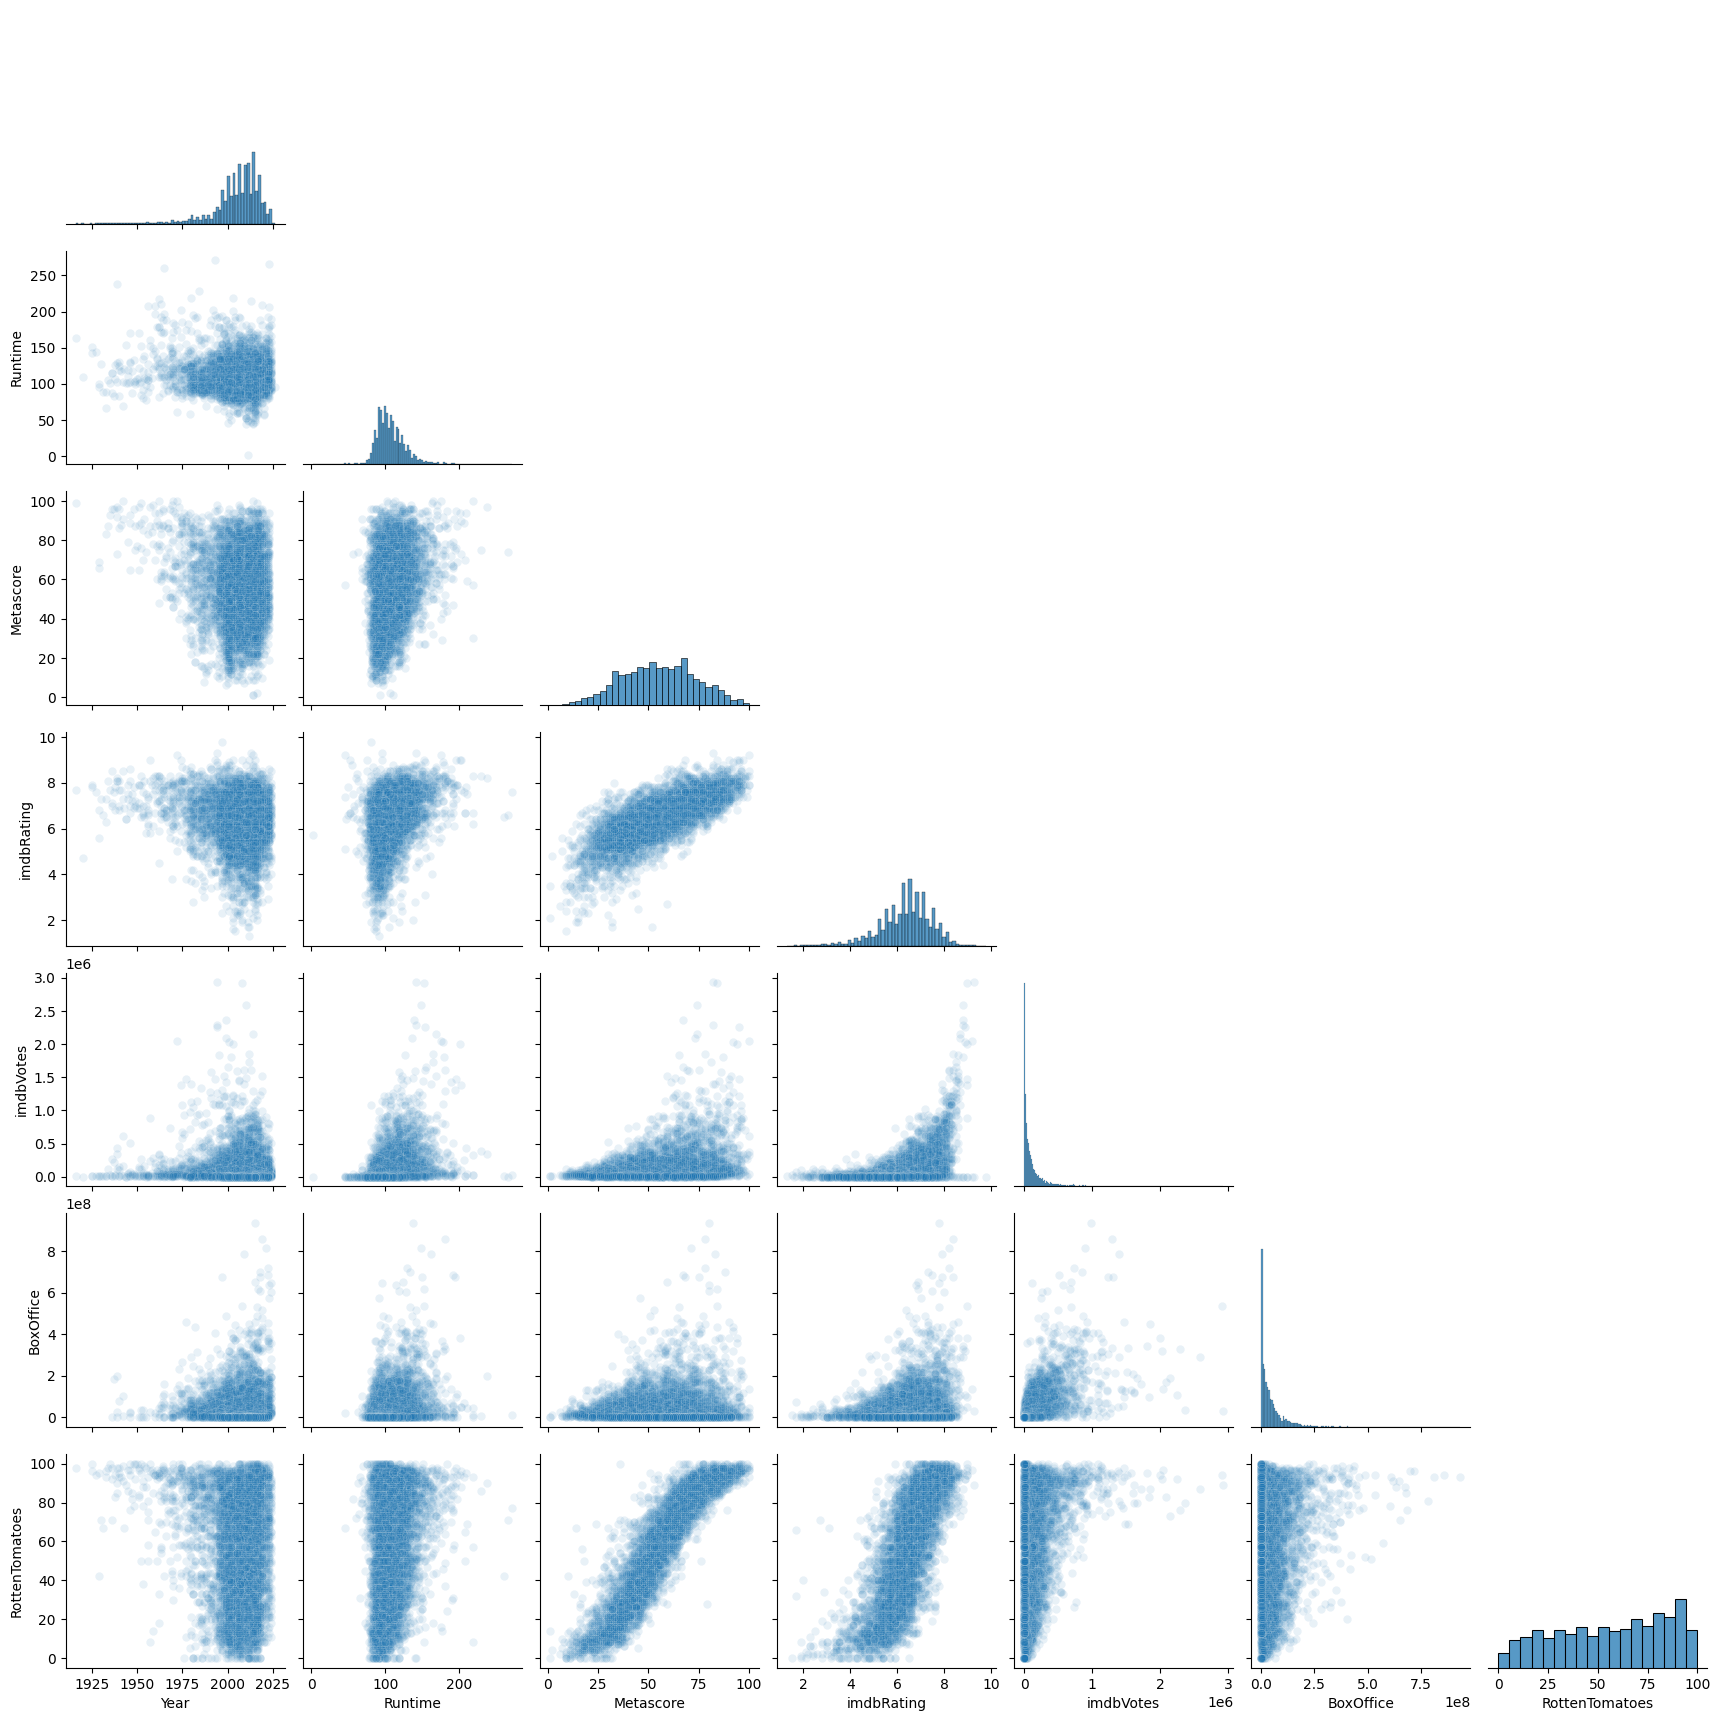

In [45]:
import seaborn as sb


sb.pairplot(df[['Year','Runtime', 'Metascore', 'imdbRating', 'imdbVotes', 'BoxOffice', 'RottenTomatoes']], corner=True, plot_kws={'alpha': 0.1})

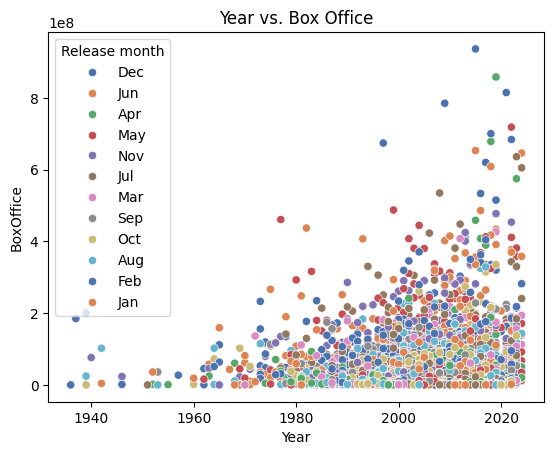

In [158]:
# Year vs. BoxOffice

from matplotlib import pyplot as plt

sb.scatterplot(x="Year", y="BoxOffice", data=df[df['Release month'] != 'Unk'], color="darkOrange", hue="Release month", palette="deep")

#sb.regplot(x="Hours", y="Salary", data=data[data["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.5})

plt.title('Year vs. Box Office')
plt.show()

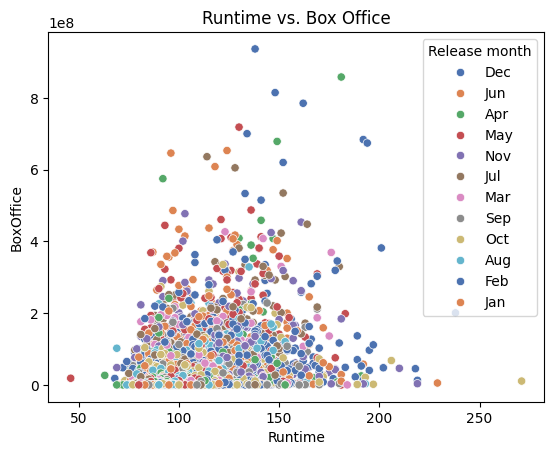

In [159]:
# Runtime vs. Box Office

sb.scatterplot(x="Runtime", y="BoxOffice", data=df[df['Release month'] != 'Unk'], color="darkOrange", hue="Release month", palette="deep")

#sb.regplot(x="Hours", y="Salary", data=data[data["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.5})

plt.title('Runtime vs. Box Office')
plt.show()

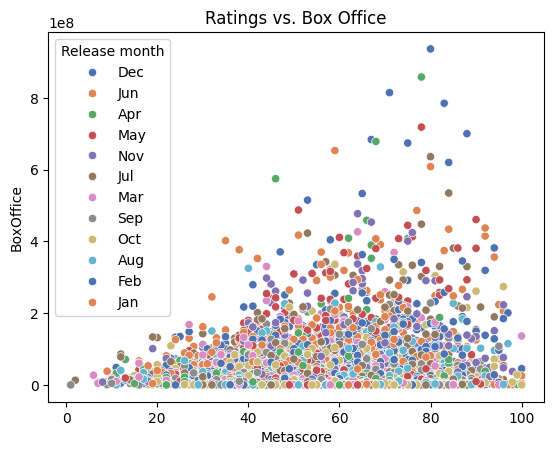

In [160]:
# Ratings vs. Box office
sb.scatterplot(x="Metascore", y="BoxOffice", data=df[df['Release month'] != 'Unk'], color="darkOrange", hue="Release month", palette="deep")

#sb.regplot(x="Hours", y="Salary", data=data[data["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.5})

plt.title('Ratings vs. Box Office')
plt.show()

In [117]:
# let's make separate columns for each 24 genres so we can use that for plotting.
genres = sum([df['Genre'].loc[df['Genre'].notna()].iloc[i] for i in range(len(df['Genre'].loc[df['Genre'].notna()]))], [])
genres

from collections import Counter

genres_count = Counter(genres)

sorted_genres = dict(sorted(genres_count.items(), key=lambda item: item[1], reverse=True))

unique_genres = list(sorted_genres.keys())

['Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Drama',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Crime',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Fantasy',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Drama',
 'Action',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Family',
 'Adventure',
 'Drama',
 'Fantasy',
 'Adventure',
 'Fantasy',
 'Action',
 'Crime',
 'Thriller',
 'Action'

In [146]:
# make the columns 

# First deal with missing values
for i in df[df['Genre'].isna()].index:
    df.at[i, 'Genre'] = []

import numpy as np

for column in range(len(unique_genres)):
    df[unique_genres[column]] = np.zeros(len(df), dtype=np.int8)
    for row in range(len(df)):

        if unique_genres[column] in df['Genre'].iloc[row]:
            df.at[row, unique_genres[column]] = 1

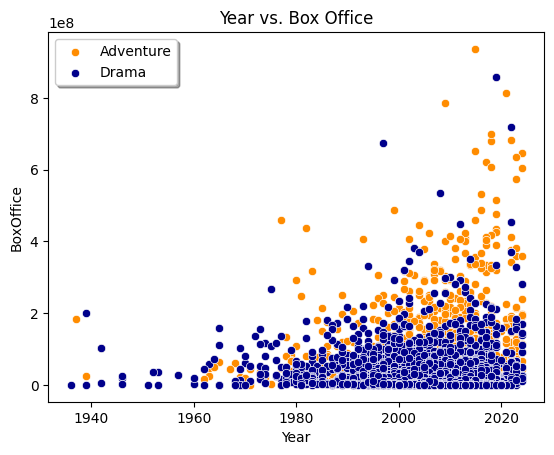

In [157]:
# Now we can make plots with different genres.

#sb.scatterplot(x="Year", y="BoxOffice", data=df[df['Release month'] != 'Unk'], color="darkOrange", hue="Release month", palette="deep")
sb.scatterplot(x="Year", y="BoxOffice", data=df[df['Adventure'] == 1], color="darkOrange")
sb.scatterplot(x="Year", y="BoxOffice", data=df[df['Drama'] == 1], color="darkBlue")

plt.legend(['Adventure', 'Drama'], shadow=True)
plt.title('Year vs. Box Office')
plt.show()


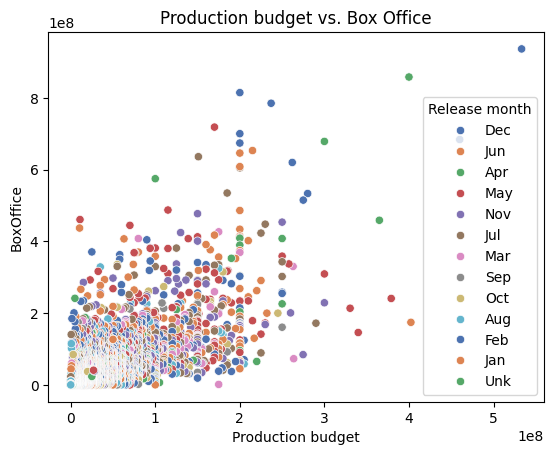

In [165]:
# Production budget vs. Box Office
sb.scatterplot(x="Production budget", y="BoxOffice", data=df, hue="Release month", palette="deep")

#sb.regplot(x="Hours", y="Salary", data=data[data["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.5})

plt.title('Production budget vs. Box Office')
plt.show()

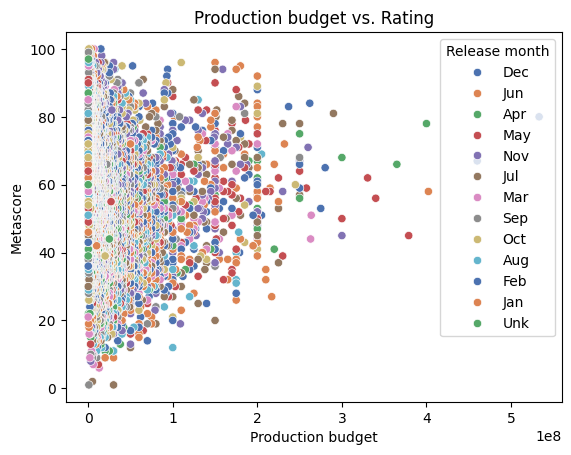

In [177]:
# budget vs. rating
sb.scatterplot(x="Production budget", y="Metascore", data=df, hue="Release month", palette="deep")


plt.title('Production budget vs. Rating')
plt.show()

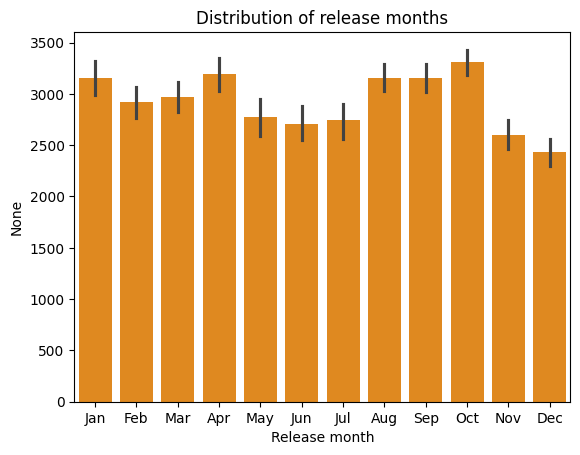

In [216]:
# distribution of release months
sb.barplot(x='Release month',data=df[df['Release month'] != 'Unk'], y=df[df['Release month'] != 'Unk']['Release month'].index,order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec'], color='darkOrange')

plt.title('Distribution of release months')
plt.show()

In [211]:
plt.bar(df[df['Release month'] != 'Unk']['Release month'])

NameError: name 'count' is not defined

In [47]:
# change the worldwide gross data type to integer
worldwide = budgets['Worldwide gross'].values

for i in range(len(worldwide)):
    worldwide[i] = worldwide[i][2:]

for i in range(len(worldwide)):
    worldwide[i] = int(worldwide[i].replace(',', ''))

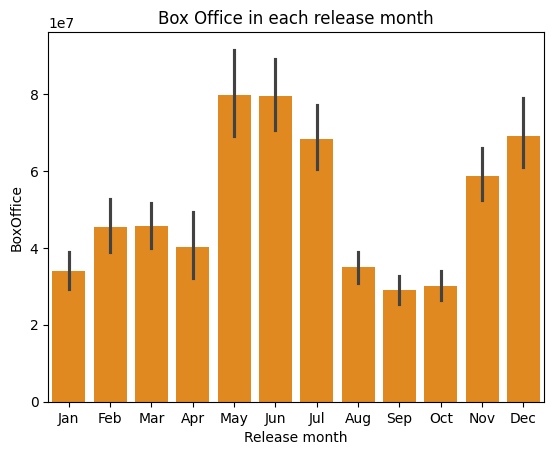

In [171]:
# Which release months have produced most.
sb.barplot(df[df['Release month'] != 'Unk'], x='Release month', y='BoxOffice', order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec'], color='darkOrange')
plt.title('Box Office in each release month')
plt.show()

In [181]:
unique_genres

['Drama',
 'Comedy',
 'Action',
 'Adventure',
 'Crime',
 'Romance',
 'Thriller',
 'Horror',
 'Mystery',
 'Biography',
 'Sci-Fi',
 'Fantasy',
 'Family',
 'Animation',
 'History',
 'Music',
 'Documentary',
 'Sport',
 'War',
 'Musical',
 'Western',
 'Film-Noir',
 'Adult',
 'News']

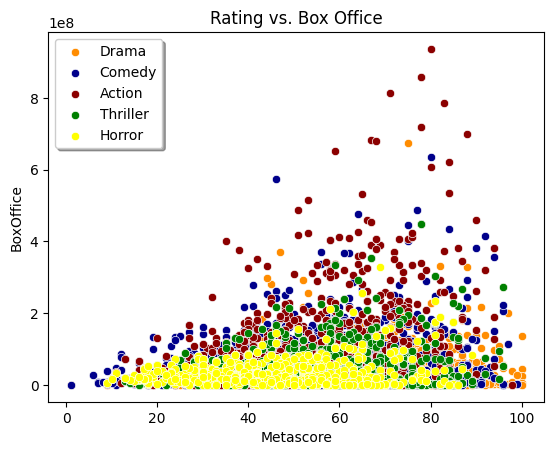

In [184]:
# same by genres: Rating vs. Box
sb.scatterplot(x="Metascore", y="BoxOffice", data=df[df['Drama'] == 1], color="darkOrange")
sb.scatterplot(x="Metascore", y="BoxOffice", data=df[df['Comedy'] == 1], color="darkBlue")
sb.scatterplot(x="Metascore", y="BoxOffice", data=df[df['Action'] == 1], color="darkRed")
sb.scatterplot(x="Metascore", y="BoxOffice", data=df[df['Thriller'] == 1], color="Green")
sb.scatterplot(x="Metascore", y="BoxOffice", data=df[df['Horror'] == 1], color="Yellow")

plt.legend(['Drama', 'Comedy','Action', 'Thriller', 'Horror'], shadow=True)
plt.title('Rating vs. Box Office')
plt.show()


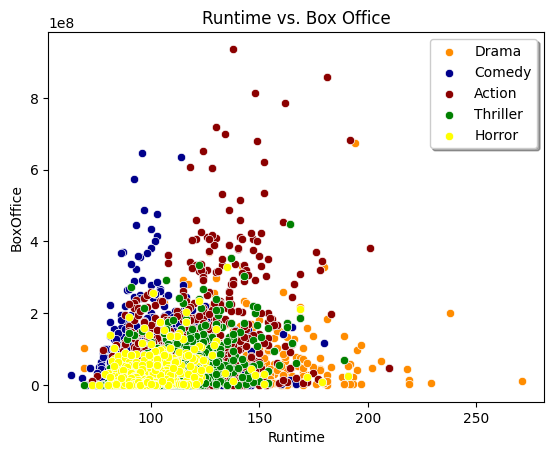

In [185]:
# Runtime
sb.scatterplot(x="Runtime", y="BoxOffice", data=df[df['Drama'] == 1], color="darkOrange")
sb.scatterplot(x="Runtime", y="BoxOffice", data=df[df['Comedy'] == 1], color="darkBlue")
sb.scatterplot(x="Runtime", y="BoxOffice", data=df[df['Action'] == 1], color="darkRed")
sb.scatterplot(x="Runtime", y="BoxOffice", data=df[df['Thriller'] == 1], color="Green")
sb.scatterplot(x="Runtime", y="BoxOffice", data=df[df['Horror'] == 1], color="Yellow")

plt.legend(['Drama', 'Comedy','Action', 'Thriller', 'Horror'], shadow=True)
plt.title('Runtime vs. Box Office')
plt.show()

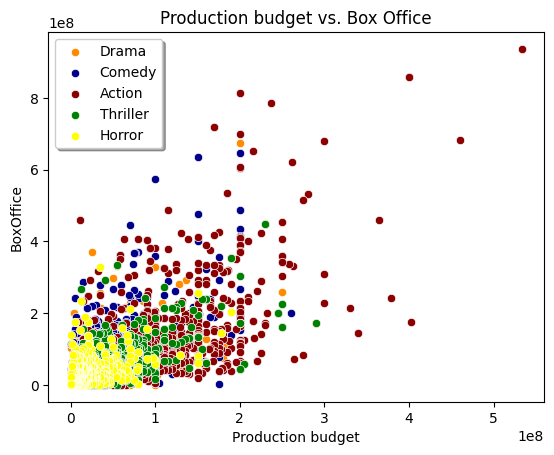

In [186]:
# budget

sb.scatterplot(x="Production budget", y="BoxOffice", data=df[df['Drama'] == 1], color="darkOrange")
sb.scatterplot(x="Production budget", y="BoxOffice", data=df[df['Comedy'] == 1], color="darkBlue")
sb.scatterplot(x="Production budget", y="BoxOffice", data=df[df['Action'] == 1], color="darkRed")
sb.scatterplot(x="Production budget", y="BoxOffice", data=df[df['Thriller'] == 1], color="Green")
sb.scatterplot(x="Production budget", y="BoxOffice", data=df[df['Horror'] == 1], color="Yellow")

plt.legend(['Drama', 'Comedy','Action', 'Thriller', 'Horror'], shadow=True)
plt.title('Production budget vs. Box Office')
plt.show()

In [200]:
df['Rated'].unique()

array(['PG-13', 'R', 'PG', 'G', 'Not Rated', 'TV-MA', None, 'TV-14',
       'TV-Y7', 'Approved', 'NC-17', 'TV-G', 'Unrated', '16+', 'TV-PG',
       'X', 'Passed', 'M/PG', 'GP', 'UNRATED'], dtype=object)

In [49]:

# change budget and domestic gross data type to integer


for i in range(len(budgets)):
    budgets['Domestic gross'].values[i] = int(budgets['Domestic gross'].values[i][2:].replace(',', ''))

for i in range(len(budgets)):
    budgets['Production budget'].values[i] = int(budgets['Production budget'].values[i][2:].replace(',', ''))




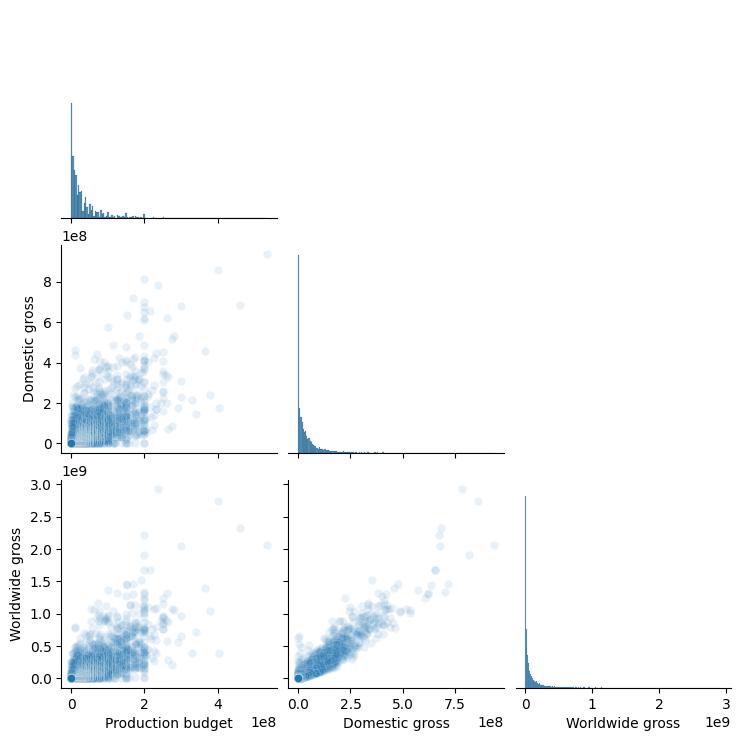

In [50]:
# make some scatterplots from budgets

sb.pairplot(budgets[['Production budget','Domestic gross', 'Worldwide gross']], corner=True, plot_kws={'alpha': 0.1})


In [51]:
# add production budgets to df
found_budgets = []
for movieid in df['imdbID'].values:
    if movieid in budgets['tconst'].loc[budgets['tconst'].notna()].values:
        found_budgets.append(budgets.loc[budgets['tconst'] == movieid]['Production budget'].values[0])
    else:
        found_budgets.append(None)

df['Production budget'] = found_budgets


In [76]:
# Ad release month to df
found_month = []
for movieid in df['imdbID'].values:
    if movieid in budgets['tconst'].loc[budgets['tconst'].notna()].values:
        found_month.append(budgets.loc[budgets['tconst'] == movieid]['Release month'].values[0])
    else:
        found_month.append('Unk')

df['Release month'] = found_month

In [52]:
# add ratio of boxoffice and budget 
df['profit ratio'] = df['BoxOffice'] / df['Production budget']

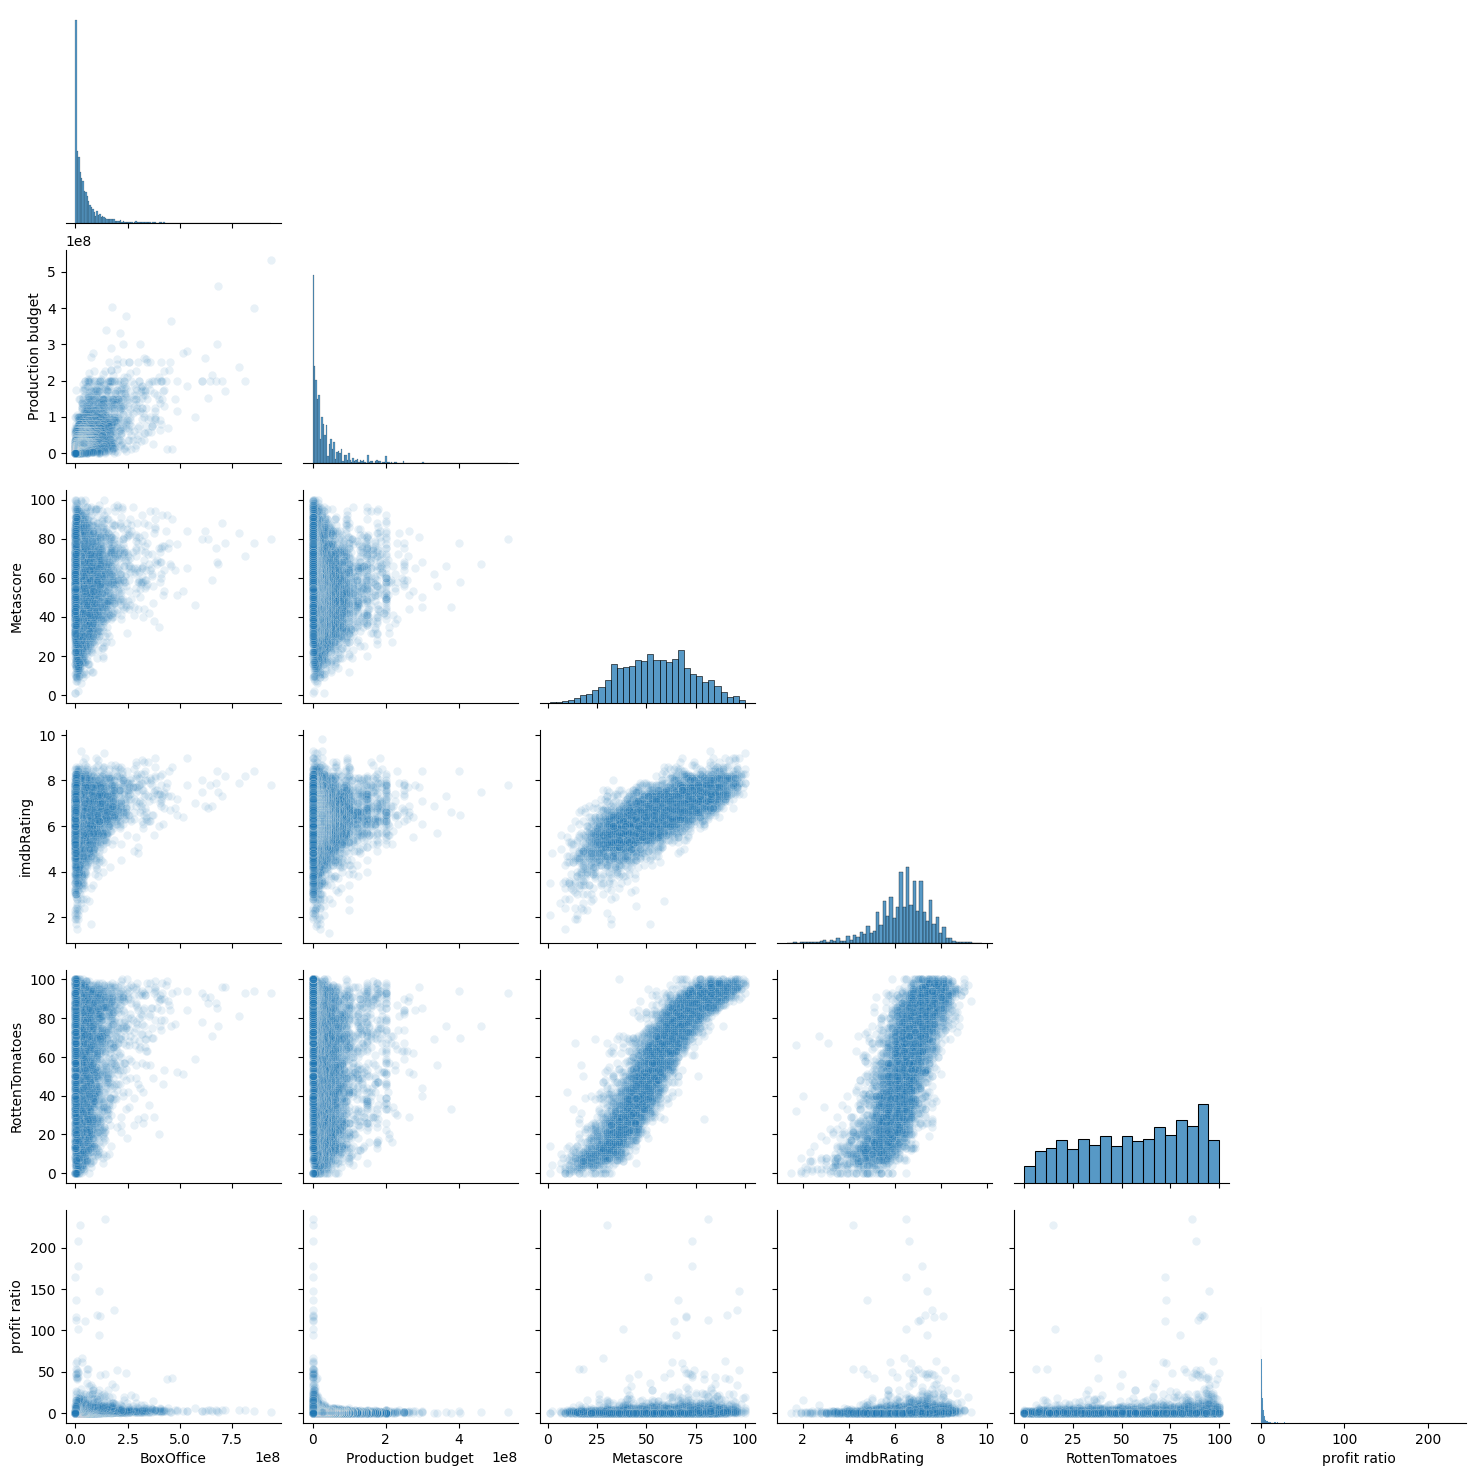

In [53]:
# plot the budget, boxoffice, ratings
sb.pairplot(df[['BoxOffice', 'Production budget', 'Metascore', 'imdbRating', 'RottenTomatoes', 'profit ratio']], corner=True, plot_kws={'alpha': 0.1})

In [201]:
# basic statistics of the ratio
df['profit ratio'].describe()


count    4982.000000
mean        2.597493
std         9.447359
min         0.000020
25%         0.434079
50%         1.035688
75%         2.181362
max       234.231832
Name: profit ratio, dtype: float64

In [313]:
df

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,Country,Awards,Metascore,imdbRating,imdbVotes,imdbID,BoxOffice,RottenTomatoes,Production budget,profit ratio
0,Star Wars: Episode VII - The Force Awakens,2015,PG-13,2015-12-18,138.0,"[Action, Adventure, Sci-Fi]",[J.J. Abrams],"[Lawrence Kasdan, J.J. Abrams, Michael Arndt]","[Daisy Ridley, John Boyega, Oscar Isaac]",30 years after the defeat of Darth Vader and t...,...,"[United States, United Kingdom]",Nominated for 5 Oscars. 64 wins & 140 nominati...,80.0,7.8,983726.0,tt2488496,936662225.0,93.0,533200000,1.756681
1,Avatar: The Way of Water,2022,PG-13,2022-12-16,192.0,"[Action, Adventure, Fantasy]",[James Cameron],"[James Cameron, Rick Jaffa, Amanda Silver]","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",Jake Sully lives with his newfound family form...,...,[United States],Won 1 Oscar. 75 wins & 150 nominations total,67.0,7.5,509749.0,tt1630029,684075767.0,76.0,460000000,1.487121
2,Indiana Jones and the Dial of Destiny,2023,PG-13,2023-06-30,154.0,"[Action, Adventure, Sci-Fi]",[James Mangold],"[Jez Butterworth, John-Henry Butterworth, Davi...","[Harrison Ford, Phoebe Waller-Bridge, Antonio ...",The plot is unknown at this time.,...,[United States],Nominated for 1 Oscar. 7 wins & 34 nominations...,58.0,6.5,207798.0,tt1462764,174480468.0,70.0,402300000,0.433707
3,Avengers: Endgame,2019,PG-13,2019-04-26,181.0,"[Action, Adventure, Drama]","[Anthony Russo, Joe Russo]","[Christopher Markus, Stephen McFeely, Stan Lee]","[Robert Downey Jr., Chris Evans, Mark Ruffalo]",After the devastating events of Avengers: Infi...,...,[United States],Nominated for 1 Oscar. 70 wins & 133 nominatio...,78.0,8.4,1297673.0,tt4154796,858373000.0,94.0,400000000,2.145932
4,Pirates of the Caribbean: On Stranger Tides,2011,PG-13,2011-05-20,136.0,"[Action, Adventure, Fantasy]",[Rob Marshall],"[Ted Elliott, Terry Rossio, Stuart Beattie]","[Johnny Depp, Penélope Cruz, Ian McShane]",Captain Jack Sparrow (Johnny Depp) crosses pat...,...,"[United States, United Kingdom]",3 wins & 31 nominations,45.0,6.6,570796.0,tt1298650,241071802.0,33.0,379000000,0.636073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5854,Cavite,2005,Not Rated,2005-03-12,80.0,"[Crime, Drama, Thriller]","[Neill Dela Llana, Ian Gamazon]","[Neill Dela Llana, Ian Gamazon]","[Ian Gamazon, Edwin Lagda, Edgar Tancangco]","Adam, a security guard, travels from Californi...",...,"[Philippines, United States]",4 wins & 2 nominations,64.0,6.0,676.0,tt0428303,70071.0,73.0,7000,10.010143
5855,Following,1998,R,1999-11-05,69.0,"[Crime, Mystery, Thriller]",[Christopher Nolan],[Christopher Nolan],"[Jeremy Theobald, Alex Haw, Lucy Russell]",An older man listens to Bill's story about bei...,...,"[United Kingdom, United States]",5 wins & 4 nominations,60.0,7.4,102938.0,tt0154506,48482.0,82.0,6000,8.080333
5856,Return to the Border,2005,PG,NaT,60.0,[Documentary],[Liang Zhao],None,None,"In the past half-century, millions of people a...",...,"[China, United States]",None,NaN,NaN,NaN,tt7667758,NaN,NaN,5000,NaN
5857,My Date with Drew,2004,PG,2005-09-30,90.0,[Documentary],"[Jon Gunn, Brian Herzlinger, Brett Winn]",None,"[Brian Herzlinger, Drew Barrymore, John August]","""If you don't take risks, you'll have a wasted...",...,[United States],11 wins,51.0,6.5,4722.0,tt0378407,181041.0,72.0,1100,164.582727


In [331]:
# Let's do some tf-idf.
# Organize the data (that has not NaN as a profit ratio) by profit ratio, and divide it into 6 droups.
# This means there are ≈ 830 movies in each group.
# Let's take the plots

text_6 = df.loc[df['profit ratio'].notna()].sort_values(by=['profit ratio'])[['Genre', 'Director', 'Writer', 'Actors', 'Plot']].iloc[:830].copy()
text_5 = df.loc[df['profit ratio'].notna()].sort_values(by=['profit ratio'])[['Genre', 'Director', 'Writer', 'Actors', 'Plot']].iloc[830:2*830].copy()
text_4 = df.loc[df['profit ratio'].notna()].sort_values(by=['profit ratio'])[['Genre', 'Director', 'Writer', 'Actors', 'Plot']].iloc[2*830:3*830].copy()
text_3 = df.loc[df['profit ratio'].notna()].sort_values(by=['profit ratio'])[['Genre', 'Director', 'Writer', 'Actors', 'Plot']].iloc[3*830:4*830].copy()
text_2 = df.loc[df['profit ratio'].notna()].sort_values(by=['profit ratio'])[['Genre', 'Director', 'Writer', 'Actors', 'Plot']].iloc[4*830:5*830].copy()
text_1 = df.loc[df['profit ratio'].notna()].sort_values(by=['profit ratio'])[['Genre', 'Director', 'Writer', 'Actors', 'Plot']].iloc[5*830:].copy()

In [410]:
# Let's do some tf-idf.
# Organize the data (that has not NaN as a profit ratio) by profit ratio, and divide it into 6 droups.
# This means there are ≈ 830 movies in each group.
# Let's take the plots

plot_6 = list(df.loc[df['profit ratio'].notna()].sort_values(by=['profit ratio'])['Plot'].iloc[:830].loc[df.loc[df['profit ratio'].notna()].sort_values(by=['profit ratio'])['Plot'].iloc[:830].notna()].copy())
plot_5 = list(df.loc[df['profit ratio'].notna()].sort_values(by=['profit ratio'])['Plot'].iloc[830:2*830].loc[df.loc[df['profit ratio'].notna()].sort_values(by=['profit ratio'])['Plot'].iloc[830:2*830].notna()].copy())
plot_4 = list(df.loc[df['profit ratio'].notna()].sort_values(by=['profit ratio'])['Plot'].iloc[2*830:3*830].loc[df.loc[df['profit ratio'].notna()].sort_values(by=['profit ratio'])['Plot'].iloc[2*830:3*830].notna()].copy())
plot_3 = list(df.loc[df['profit ratio'].notna()].sort_values(by=['profit ratio'])['Plot'].iloc[3*830:4*830].loc[df.loc[df['profit ratio'].notna()].sort_values(by=['profit ratio'])['Plot'].iloc[3*830:4*830].notna()].copy())
plot_2 = list(df.loc[df['profit ratio'].notna()].sort_values(by=['profit ratio'])['Plot'].iloc[4*830:5*830].loc[df.loc[df['profit ratio'].notna()].sort_values(by=['profit ratio'])['Plot'].iloc[4*830:5*830].notna()].copy())
plot_1 = list(df.loc[df['profit ratio'].notna()].sort_values(by=['profit ratio'])['Plot'].iloc[5*830:].loc[df.loc[df['profit ratio'].notna()].sort_values(by=['profit ratio'])['Plot'].iloc[5*830:].notna()].copy())

In [417]:
# lowercase the texts
for i in range(len(plot_6)):
    plot_6[i] = plot_6[i].lower()

for i in range(len(plot_5)):
    plot_5[i] = plot_5[i].lower()

for i in range(len(plot_4)):
    plot_4[i] = plot_4[i].lower()

for i in range(len(plot_3)):
    plot_3[i] = plot_3[i].lower()

for i in range(len(plot_2)):
    plot_2[i] = plot_2[i].lower()

for i in range(len(plot_1)):
    plot_1[i] = plot_1[i].lower()


In [421]:
# Let's remove punctuation and stowords

import string

# Create a dictionary for translate method for removing punctuation
translator_pun = str.maketrans({key: None for key in string.punctuation})

# remove punctuation
for i in range(len(plot_1)):
    plot_1[i] = plot_1[i].translate(translator_pun)

for i in range(len(plot_6)):
    plot_6[i] = plot_6[i].translate(translator_pun)

for i in range(len(plot_5)):
    plot_5[i] = plot_5[i].translate(translator_pun)

for i in range(len(plot_4)):
    plot_4[i] = plot_4[i].translate(translator_pun)

for i in range(len(plot_3)):
    plot_3[i] = plot_3[i].translate(translator_pun)

for i in range(len(plot_2)):
    plot_2[i] = plot_2[i].translate(translator_pun)

for i in range(len(plot_1)):
    plot_1[i] = plot_1[i].translate(translator_pun)






In [429]:
# Now let's remove stopwords

import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from collections import Counter

stop_words = stopwords.words('english')
stopwords_dict = Counter(stop_words)




for i in range(len(plot_6)):
    plot_6[i] = ' '.join([word for word in plot_6[i].split() if word not in stopwords_dict])

for i in range(len(plot_5)):
    plot_5[i] = ' '.join([word for word in plot_5[i].split() if word not in stopwords_dict])

for i in range(len(plot_4)):
    plot_4[i] = ' '.join([word for word in plot_4[i].split() if word not in stopwords_dict])

for i in range(len(plot_3)):
    plot_3[i] = ' '.join([word for word in plot_3[i].split() if word not in stopwords_dict])

for i in range(len(plot_2)):
    plot_2[i] = ' '.join([word for word in plot_2[i].split() if word not in stopwords_dict])

for i in range(len(plot_1)):
    plot_1[i] = ' '.join([word for word in plot_1[i].split() if word not in stopwords_dict])

[nltk_data] Downloading package stopwords to /Users/zimo/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [433]:
# Stem the words

import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# had to load this package
#nltk.download('punkt_tab')

porter = PorterStemmer()
for i in range(len(plot_6)):
    # tokenize
    tokenizedwords = word_tokenize(plot_6[i])
    # stem
    tokenizedsentence = []
    for word in tokenizedwords:
        tokenizedsentence.append(porter.stem(word))
    plot_6[i] = " ".join(tokenizedsentence)

for i in range(len(plot_5)):
    # tokenize
    tokenizedwords = word_tokenize(plot_5[i])
    # stem
    tokenizedsentence = []
    for word in tokenizedwords:
        tokenizedsentence.append(porter.stem(word))
    plot_5[i] = " ".join(tokenizedsentence)

for i in range(len(plot_4)):
    # tokenize
    tokenizedwords = word_tokenize(plot_4[i])
    # stem
    tokenizedsentence = []
    for word in tokenizedwords:
        tokenizedsentence.append(porter.stem(word))
    plot_4[i] = " ".join(tokenizedsentence)

for i in range(len(plot_3)):
    # tokenize
    tokenizedwords = word_tokenize(plot_3[i])
    # stem
    tokenizedsentence = []
    for word in tokenizedwords:
        tokenizedsentence.append(porter.stem(word))
    plot_3[i] = " ".join(tokenizedsentence)

for i in range(len(plot_2)):
    # tokenize
    tokenizedwords = word_tokenize(plot_2[i])
    # stem
    tokenizedsentence = []
    for word in tokenizedwords:
        tokenizedsentence.append(porter.stem(word))
    plot_2[i] = " ".join(tokenizedsentence)

for i in range(len(plot_1)):
    # tokenize
    tokenizedwords = word_tokenize(plot_1[i])
    # stem
    tokenizedsentence = []
    for word in tokenizedwords:
        tokenizedsentence.append(porter.stem(word))
    plot_1[i] = " ".join(tokenizedsentence)


In [434]:
plot_6

['follow pass fifa baton three associ presid jule rimet joao havelang sepp blatter',
 'philipp mar reason man unreason world he tri good father kind exhusband nice colleagu understand sibl planet exactli align favor late son turn hardcor vegan daughter patholog overachiev sister sell overs paint nake parent seem everso prudent philipp everyon around start behav errat jérôme work colleagu whose insan contagi arriv scene philipp life career utterli control',
 'halfstrip zebra born insular isol herd obsess stripe rumor strang foal curs spread long blame drought set great karoo even father leader herd blame lack rain subsequ death mother outcast zebra leav confin home know can not surviv herd without stripe khumba ventur beyond fenc vulner feroci leopard phango control waterhol terror anim great karoo khumba rescu opportunist wild dog quirki duo wildebeest ostrich mama v selfconfess free spirit want averag stayathom mom like wildebeest iron mother bradley flamboy insecur ostrich overcompen

In [436]:
# Write the plots in text files


with open('plot_6.txt', 'w') as p6:
    for i in range(len(plot_6)):
        p6.write(plot_6[i] + '\n')

with open('plot_5.txt', 'w') as p5:
    for i in range(len(plot_5)):
        p5.write(plot_5[i] + '\n')

with open('plot_4.txt', 'w') as p4:
    for i in range(len(plot_4)):
        p4.write(plot_4[i] + '\n')

with open('plot_3.txt', 'w') as p3:
    for i in range(len(plot_3)):
        p3.write(plot_3[i] + '\n')

with open('plot_2.txt', 'w') as p2:
    for i in range(len(plot_2)):
        p2.write(plot_2[i] + '\n')

with open('plot_1.txt', 'w') as p1:
    for i in range(len(plot_1)):
        p1.write(plot_1[i] + '\n')

In [6]:
# let's do some tf-idf
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
# make the tf/idf for plots
tfidf = TfidfVectorizer(input='filename', analyzer='word')
vectorized_tfidf = tfidf.fit_transform(['plot_6.txt', 'plot_5.txt', 'plot_4.txt', 'plot_3.txt', 'plot_2.txt', 'plot_1.txt'])

plots_df = pd.DataFrame(vectorized_tfidf.toarray(),index=['plot_6.txt', 'plot_5.txt', 'plot_4.txt', 'plot_3.txt', 'plot_2.txt', 'plot_1.txt'], columns=tfidf.get_feature_names_out())

In [208]:
# Check out what we got

terms = tfidf.get_feature_names_out()

tfidf_6 = plots_df.iloc[0]
tfidf_5 = plots_df.iloc[1]
tfidf_4 = plots_df.iloc[2]
tfidf_3 = plots_df.iloc[3]
tfidf_2 = plots_df.iloc[4]
tfidf_1 = plots_df.iloc[5]

plot_6_tuples = [(terms[i], tfidf_6[i]) for i in range(0, len(terms))]
plot_6_tuples.sort(key = lambda x: x[1], reverse=True)

plot_5_tuples = [(terms[i], tfidf_5[i]) for i in range(0, len(terms))]
plot_5_tuples.sort(key = lambda x: x[1], reverse=True)

plot_4_tuples = [(terms[i], tfidf_4[i]) for i in range(0, len(terms))]
plot_4_tuples.sort(key = lambda x: x[1], reverse=True)

plot_3_tuples = [(terms[i], tfidf_3[i]) for i in range(0, len(terms))]
plot_3_tuples.sort(key = lambda x: x[1], reverse=True)

plot_2_tuples = [(terms[i], tfidf_2[i]) for i in range(0, len(terms))]
plot_2_tuples.sort(key = lambda x: x[1], reverse=True)

plot_1_tuples = [(terms[i], tfidf_1[i]) for i in range(0, len(terms))]
plot_1_tuples.sort(key = lambda x: x[1], reverse=True)



# now, for example the 10 words with the biggest tfidf scores are
np.array(plot_1_tuples[:10])

array([['life', '0.20051945648926808'],
       ['one', '0.19981090717305158'],
       ['find', '0.18989121674602066'],
       ['new', '0.1714689345243918'],
       ['get', '0.16154924409736085'],
       ['friend', '0.14950390572168043'],
       ['famili', '0.14737825777303096'],
       ['time', '0.13037307418383506'],
       ['live', '0.12116193307302064'],
       ['take', '0.11832773580815466']], dtype='<U32')

In [221]:
best_words = pd.DataFrame(plot_1_tuples[:30])[0]
worst_words = pd.DataFrame(plot_6_tuples[:30])[0]


In [226]:
best_words.values
worst_words.values

array(['life', 'one', 'find', 'new', 'get', 'friend', 'famili', 'time',
       'live', 'take', 'love', 'father', 'year', 'day', 'becom', 'two',
       'make', 'work', 'go', 'tri', 'help', 'school', 'want', 'young',
       'way', 'man', 'back', 'hous', 'mother', 'meet'], dtype=object)

In [229]:
dat = {'Profitable words': best_words.values, 'Non-profitable words': worst_words.values}
words = pd.DataFrame(dat)

words.to_csv('Profitable_vs_not_words.csv', index=False)

In [23]:

#import pickle

#with open('movie_data_with_budgets.pkl', 'rb') as f:
#    data = pickle.load(f)
import pandas as pd

tags = pd.read_csv('hetrec2011-movielens-2k-v2-2/tags.dat', sep='\t', encoding='ISO-8859-1')
movie_tags = pd.read_csv('hetrec2011-movielens-2k-v2-2/movie_tags.dat', sep='\t', encoding='ISO-8859-1')
hetrec_movies = pd.read_csv('hetrec2011-movielens-2k-v2-2/movies.dat', sep='\t', encoding='ISO-8859-1')

In [33]:
hetrec_movies.head(20)

,id,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,...,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
0,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9,73,73,...,100,8.5,17,17,0,100,3.7,102338,81,http://content7.flixster.com/movie/10/93/63/10...
1,2,Jumanji,113497,Jumanji,http://ia.media-imdb.com/images/M/MV5BMzM5NjE1...,1995,1068044-jumanji,5.6,28,13,...,46,5.8,5,2,3,40,3.2,44587,61,http://content8.flixster.com/movie/56/79/73/56...
2,3,Grumpy Old Men,107050,Dos viejos gruñones,http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...,1993,grumpy_old_men,5.9,36,24,...,66,7,6,5,1,83,3.2,10489,66,http://content6.flixster.com/movie/25/60/25602...
3,4,Waiting to Exhale,114885,Esperando un respiro,http://ia.media-imdb.com/images/M/MV5BMTczMTMy...,1995,waiting_to_exhale,5.6,25,14,...,56,5.5,11,5,6,45,3.3,5666,79,http://content9.flixster.com/movie/10/94/17/10...
4,5,Father of the Bride Part II,113041,Vuelve el padre de la novia (Ahora también abu...,http://ia.media-imdb.com/images/M/MV5BMTg1NDc2...,1995,father_of_the_bride_part_ii,5.3,19,9,...,47,5.4,5,1,4,20,3,13761,64,http://content8.flixster.com/movie/25/54/25542...
5,6,Heat,113277,Heat,http://ia.media-imdb.com/images/M/MV5BMTM1NDc4...,1995,1068182-heat,7.7,58,50,...,86,7.2,17,14,3,82,3.9,42785,92,http://content9.flixster.com/movie/26/80/26809...
6,7,Sabrina,47437,Sabrina,http://ia.media-imdb.com/images/M/MV5BMTYyNDM1...,1954,1018047-sabrina,7.4,31,28,...,90,7.2,5,5,0,100,3.8,12812,87,http://content7.flixster.com/movie/10/93/36/10...
7,8,Tom and Huck,112302,Tom y Huck,http://ia.media-imdb.com/images/M/MV5BMTUxNDYz...,1995,tom_and_huck,4.2,8,2,...,25,0,2,1,1,50,2.7,2649,45,http://content9.flixster.com/movie/26/16/26169...
8,9,Sudden Death,114576,Sudden Death: muerte súbita,http://ia.media-imdb.com/images/M/MV5BMTcwMTU2...,1995,1068470-sudden_death,5.2,32,17,...,53,5.6,9,5,4,55,2.6,3626,40,http://content8.flixster.com/movie/27/91/27912...
9,10,GoldenEye,113189,GoldenEye,http://ia.media-imdb.com/images/M/MV5BNTE1OTEx...,1995,goldeneye,6.8,41,33,...,80,6.2,11,7,4,63,3.4,28260,78,http://content9.flixster.com/movie/26/66/26669...
